<a href="https://www.kaggle.com/code/himanshunakrani/linear-regression?scriptVersionId=103947662" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Prediction Using Supervised Machine Learning**
### **Author:** Himanshu Nakrani

# **Task** - Predict the Percentage of a student based on the number of study hours.

## importing the libraries

In [1]:
#importing all the required libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

## reading the Data

In [3]:
data = pd.read_csv('../input/student-study-hours/score.csv')

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
X = data.drop(columns = ['Scores'], axis = 1)
y = data.drop(columns = ['Hours'], axis = 1)

Text(0.5, 1.0, 'plot of number of Study hours vs Marks of the student')

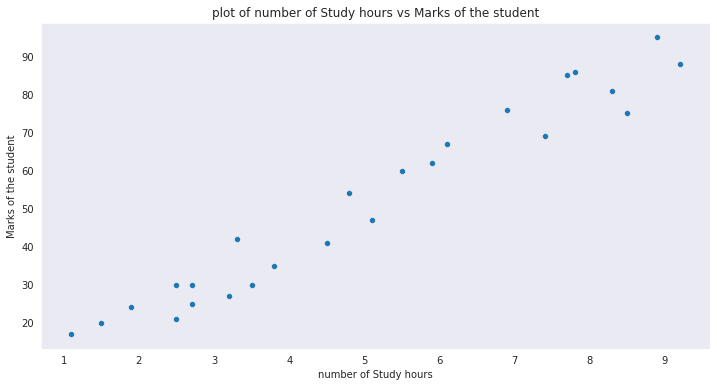

In [7]:
plt.figure(figsize = (12, 6))
sns.set_style("dark")
sns.scatterplot(x = data['Hours'], y = data['Scores'])
plt.xlabel("number of Study hours")
plt.ylabel("Marks of the student")
plt.title("plot of number of Study hours vs Marks of the student")

Text(0.5, 1.0, 'Correlation between columns')

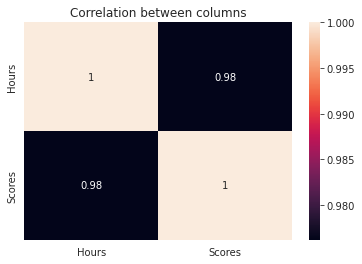

In [8]:
correlation = data.corr()
sns.heatmap(correlation,annot=True)
plt.title("Correlation between columns")

## splitting data for the training

In [9]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

## Modelling

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
print("Coefficient of the model: ",model.coef_)
print("Intercept of the model: ", model.intercept_)

Coefficient of the model:  [[9.68207815]]
Intercept of the model:  [2.82689235]


In [12]:
y_pred = model.predict(X_train)

Text(0.5, 1.0, 'plot of number of Study hours vs Marks of the student')

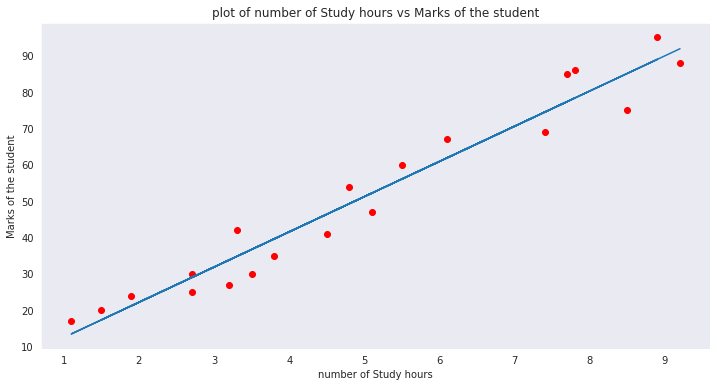

In [13]:
plt.figure(figsize = (12, 6))
sns.set_style("dark")
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, y_pred)
plt.xlabel("number of Study hours")
plt.ylabel("Marks of the student")
plt.title("plot of number of Study hours vs Marks of the student")

## model evaluation

In [14]:
y_pred = model.predict(X_test)

Text(0.5, 1.0, 'Actual vs Predicted Marks')

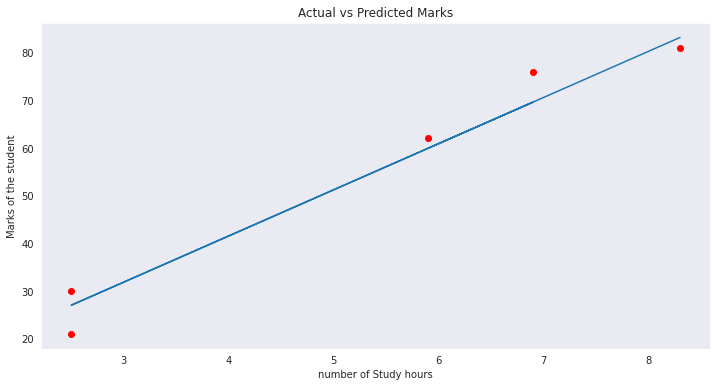

In [15]:
plt.figure(figsize = (12, 6))
sns.set_style("dark")
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_pred)
plt.xlabel("number of Study hours")
plt.ylabel("Marks of the student")
plt.title("Actual vs Predicted Marks")

In [16]:
acc = model.score(X_test, y_test)
print("Accuracy: ", round(acc*100, 2))
print("MAE:      ",round(mean_absolute_error(y_test,y_pred), 2))
print("MSE:      ",round(mean_squared_error(y_test,y_pred), 2))
print("RMSE:     ",round(np.sqrt(mean_squared_error(y_test,y_pred)), 2))
print("R2 score: ", round(r2_score(y_test,y_pred), 2))

Accuracy:  96.78
MAE:       3.92
MSE:       18.94
RMSE:      4.35
R2 score:  0.97


## Prediction

In [17]:
print("Marks of student who studied 9.25 hours a day:  ", model.predict([[9.25]]))

Marks of student who studied 9.25 hours a day:   [[92.38611528]]
